<a href="https://colab.research.google.com/github/IsmaTariq18/Machine-Learning-Tasks-DEP/blob/main/ML_Task_3_DEP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Section I: Data Cleaning and Preprocessing**

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Load dataset (replace with your dataset link or file path)
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'  # Example dataset
df = pd.read_csv(url)

# Data Preprocessing
# Drop irrelevant columns (example: dropping Name, Ticket, and Cabin in Titanic dataset)
df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

# Handle missing values (filling missing Age with mean and Embarked with mode)
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Convert categorical variables to dummy/one-hot encoding
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

# **Section II: Exploratory Data Analysis (EDA)**

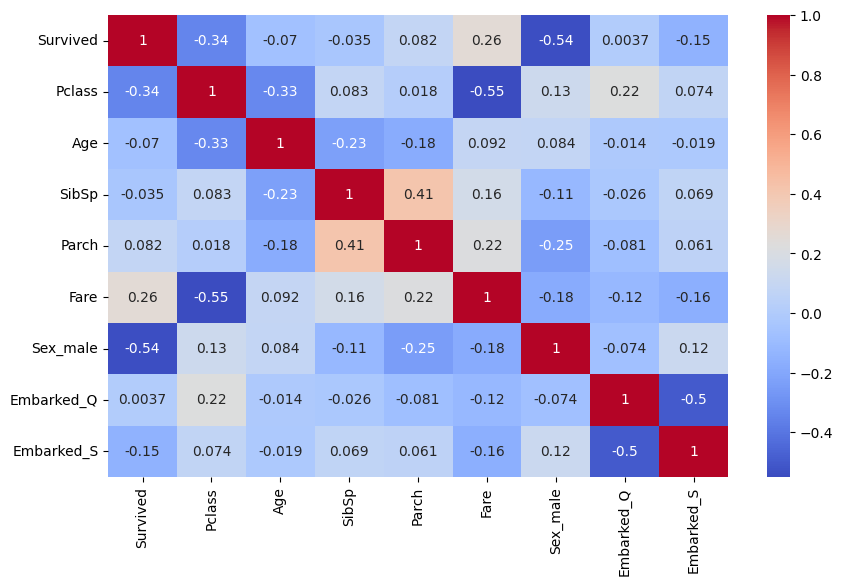

In [3]:
# Check for correlation
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

# **Section III: Feature Engineering**

In [4]:
# Split the data into training and test sets
X = df.drop('Survived', axis=1)  # Replace 'Survived' with your target column for churn prediction
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# **Section IV: Model Selection and Training**

**Logistic Regression Model**

In [5]:
#Logistic Regression
log_model = LogisticRegression()
log_model.fit(X_train_scaled, y_train)

# Model Evaluation: Logistic Regression
y_pred_log = log_model.predict(X_test_scaled)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_log))

Logistic Regression Accuracy: 0.8100558659217877
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



**Random Forest Model**

Random Forest Accuracy: 0.8044692737430168
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       105
           1       0.78      0.73      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179



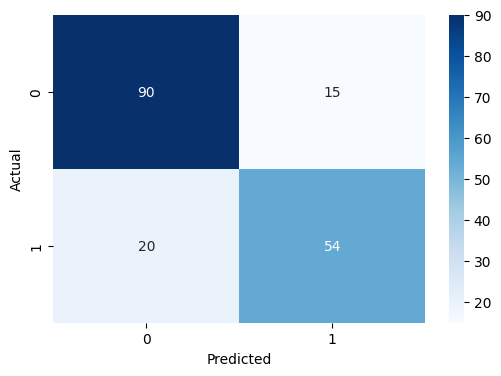

In [6]:
# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Model Evaluation: Random Forest
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Confusion Matrix for the better model
cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# **Section V: Model Evaluation and Fine-Tuning**

In [12]:
# Hyperparameter Tuning for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best parameters and accuracy after tuning
print("Best parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)
print("Best Random Forest Accuracy after tuning:", accuracy_score(y_test, y_pred_best))

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best parameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 100}
Best Random Forest Accuracy after tuning: 0.8268156424581006
